In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from scipy.stats import mannwhitneyu
import numpy as np

In [30]:
baselines = pd.read_csv('../main/log/elite_change.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size","log","elite_child"])

In [31]:
baselines.drop_duplicates(subset = ["algo",  "threshold", "dataset", "seed", "generation"], keep = 'last', inplace = True)

In [32]:
# baselines = baselines.query("threshold == 1000")

In [4]:
results = pd.read_csv('../main/log/sshc.csv', names=["algo", "experiment_id",  "threshold", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness", "elite_size","log"])

In [5]:
results.head()

,algo,experiment_id,threshold,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,log
0,SLIM*1SIG,439a6699-379a-11ef-9c6b-049226d8b1cb,100,yatch,0,0,15.497589,0.073016,1490.0,14.884969,7,1
1,SLIM*1SIG,439a6699-379a-11ef-9c6b-049226d8b1cb,100,yatch,0,1,15.378736,0.078027,1968.0,14.561405,7,1
2,SLIM*1SIG,439a6699-379a-11ef-9c6b-049226d8b1cb,100,yatch,0,2,15.221442,0.075009,2866.0,14.249313,39,1
3,SLIM*1SIG,439a6699-379a-11ef-9c6b-049226d8b1cb,100,yatch,0,3,15.221442,0.076018,3690.0,14.249313,39,1
4,SLIM*1SIG,439a6699-379a-11ef-9c6b-049226d8b1cb,100,yatch,0,4,15.103075,0.076092,4636.0,14.075436,97,1


In [6]:
results.algo.unique()

array(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG'], dtype=object)

In [7]:
colors = ['lightsalmon', 'lightblue', 'lightgreen']
e_colors = ['red', 'blue', 'green']
e_style = ['dashed', 'dotted', 'dashdot']

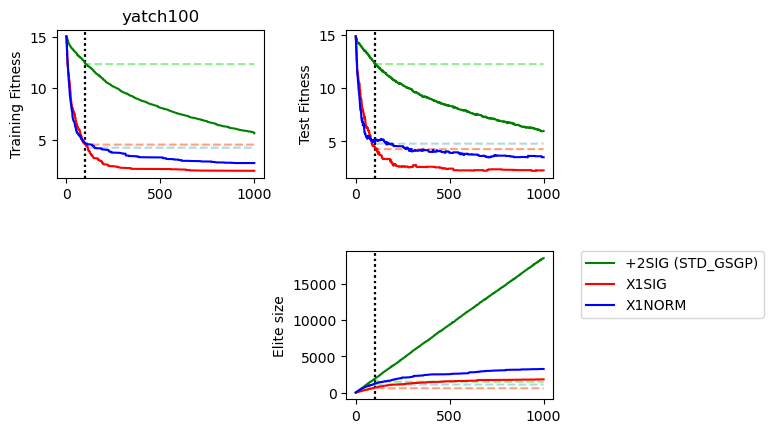

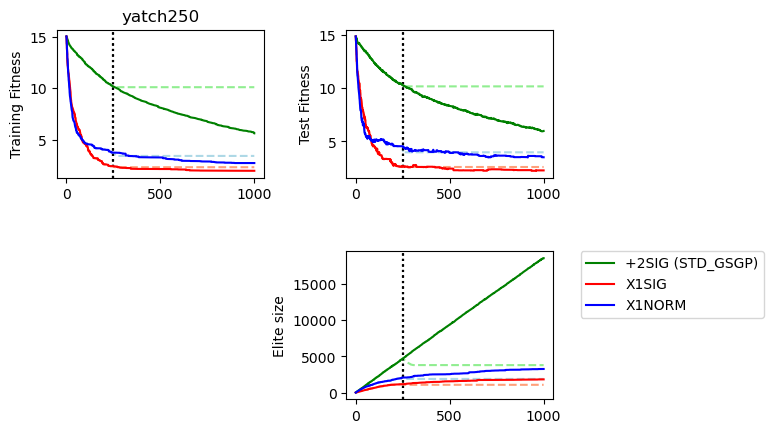

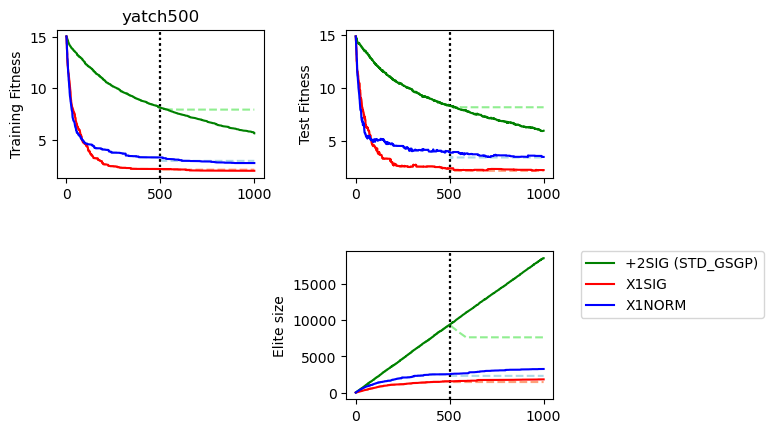

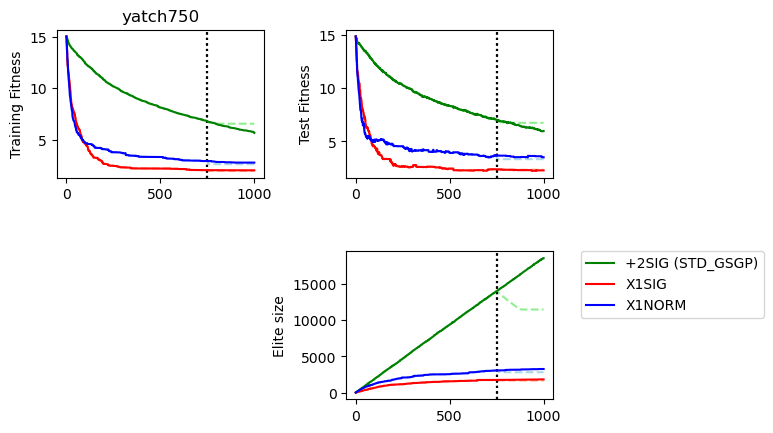

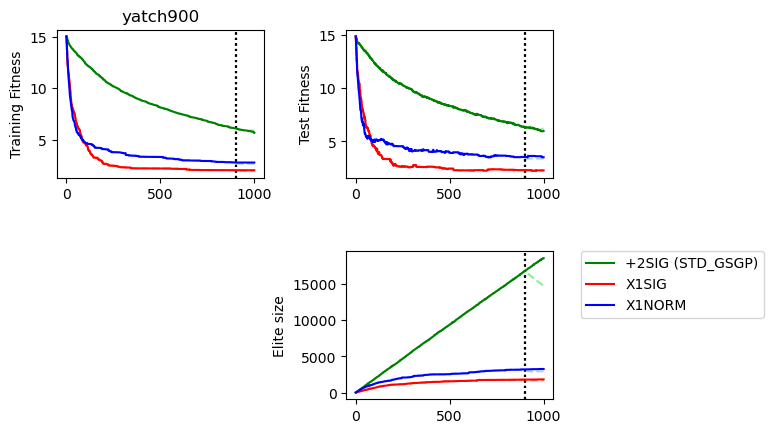

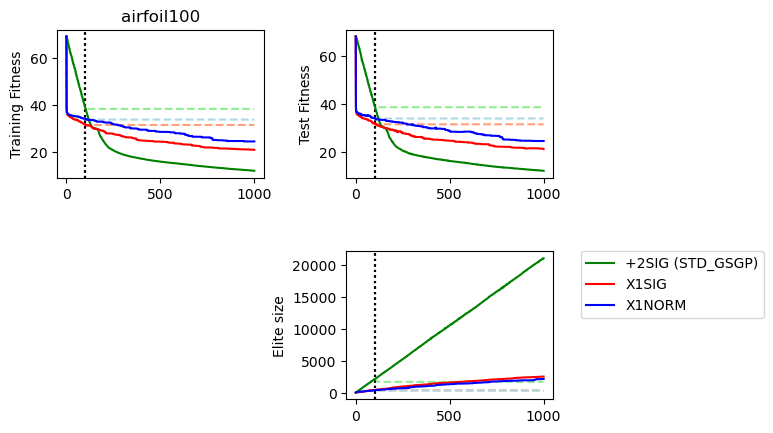

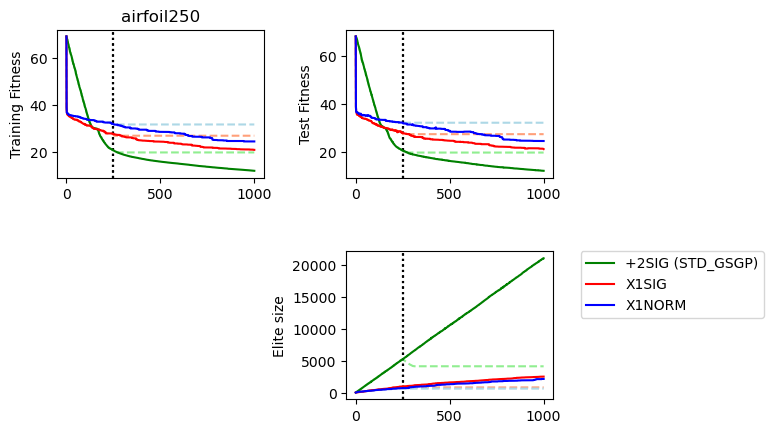

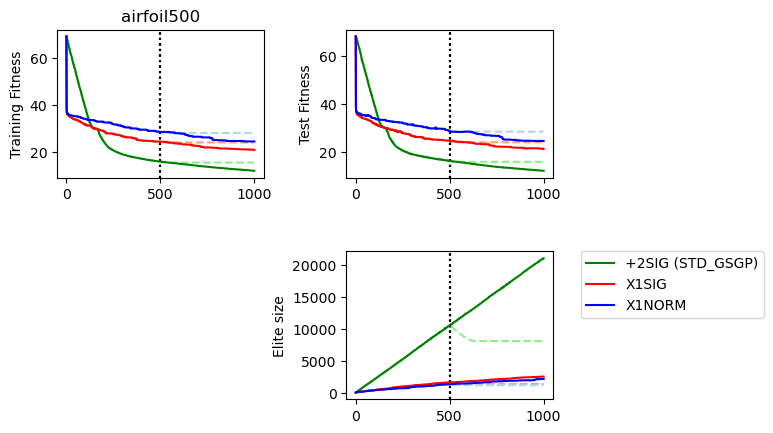

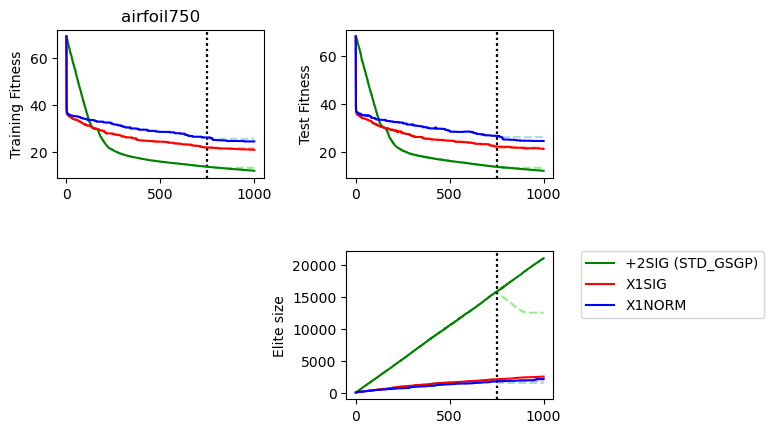

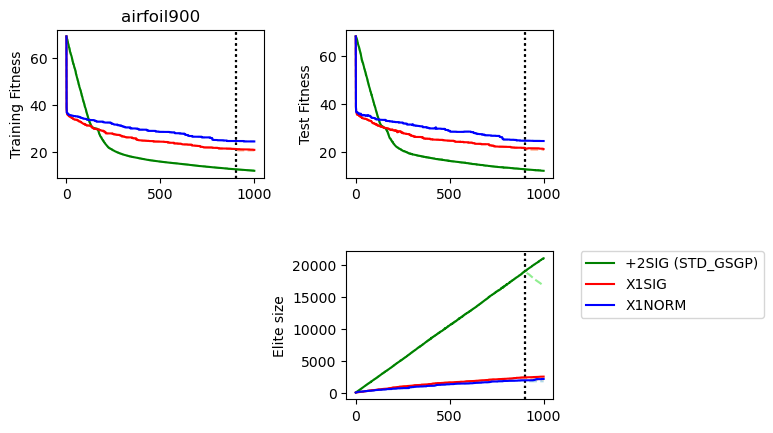

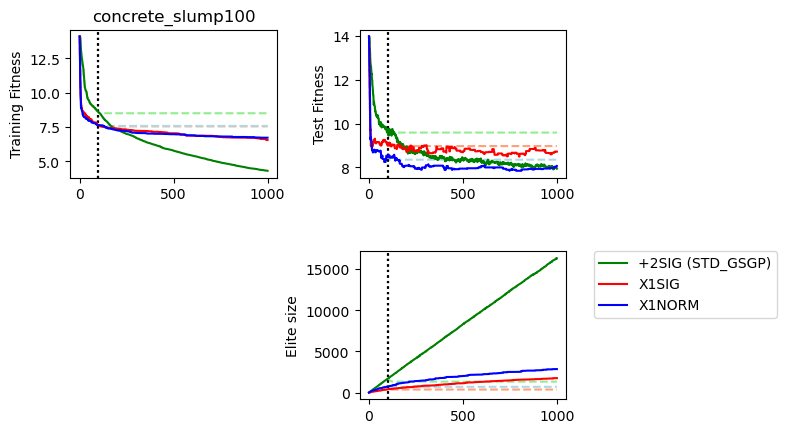

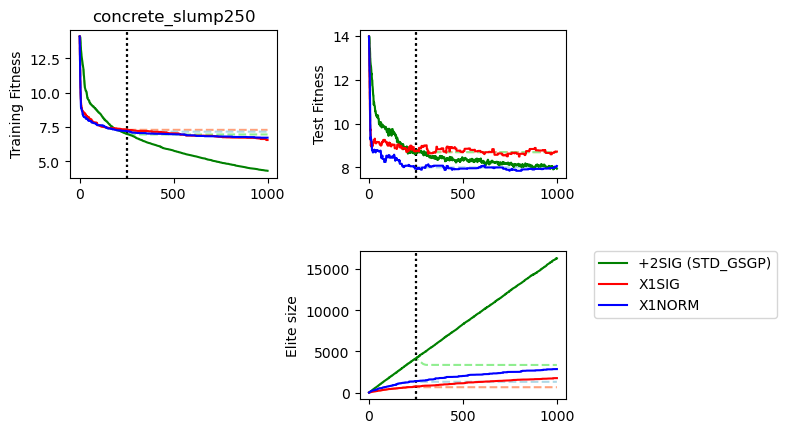

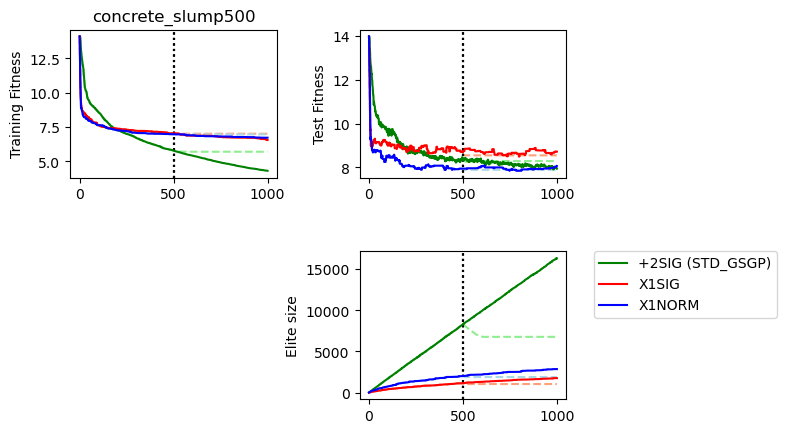

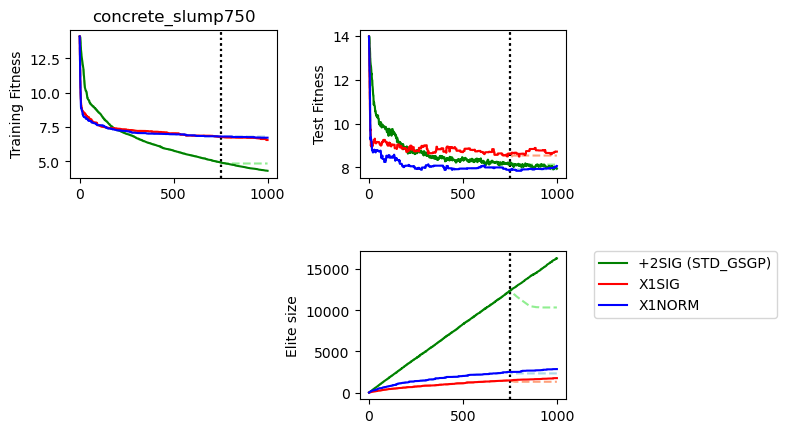

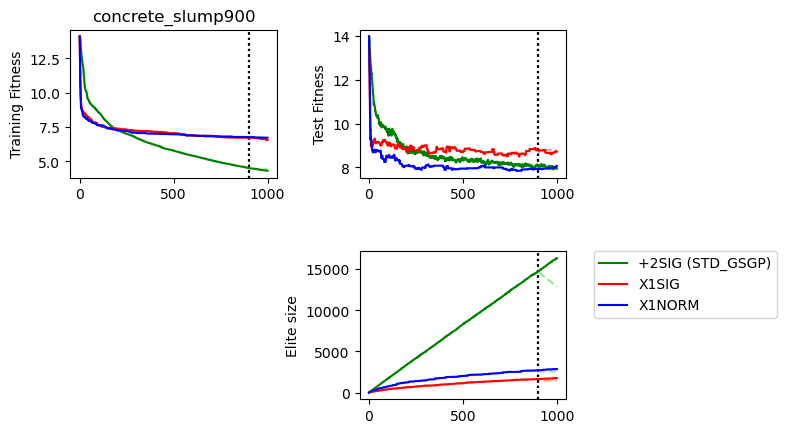

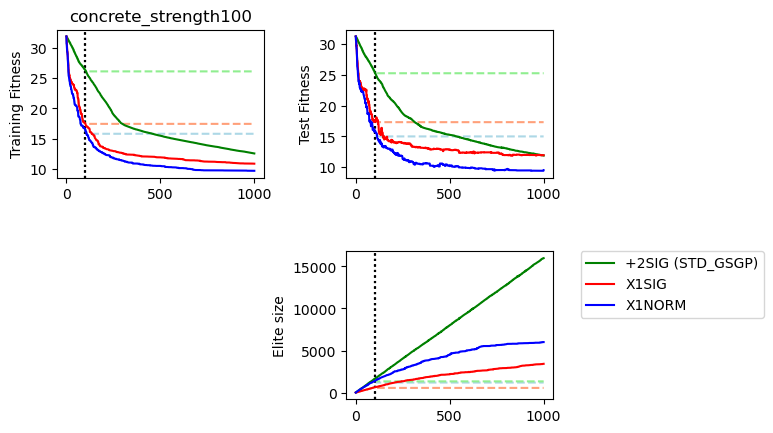

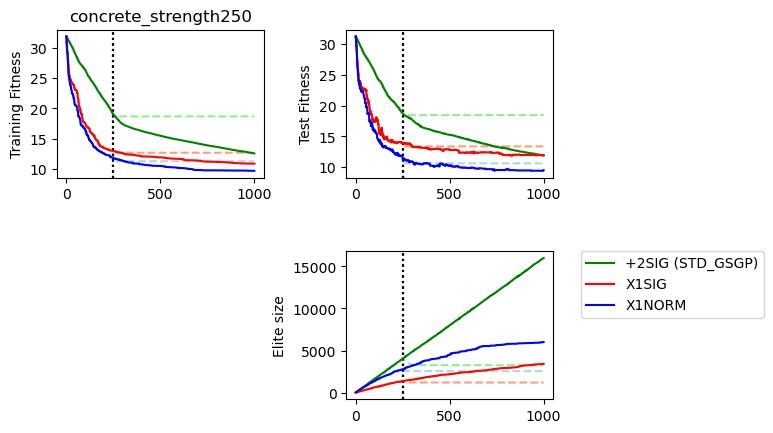

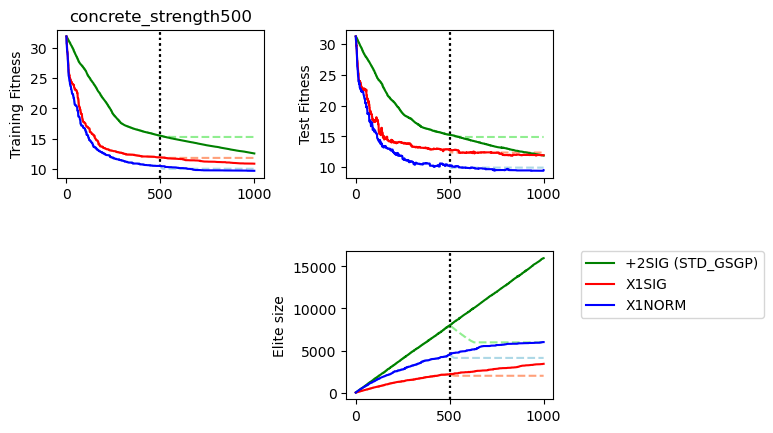

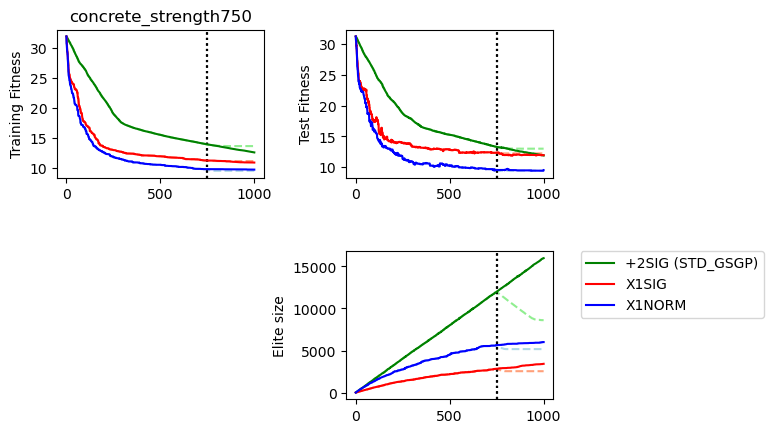

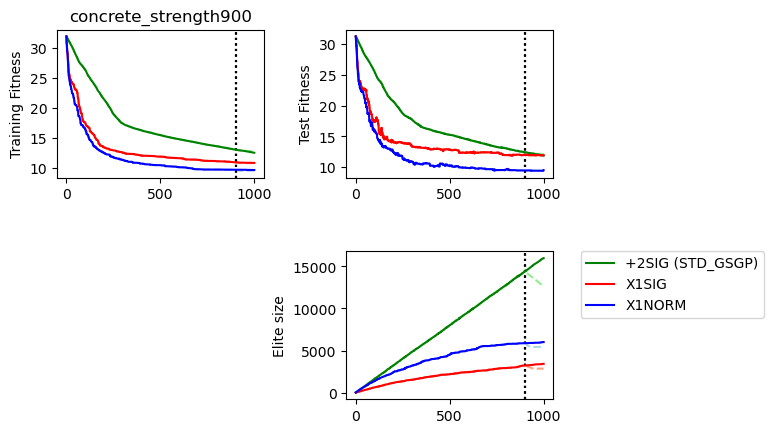

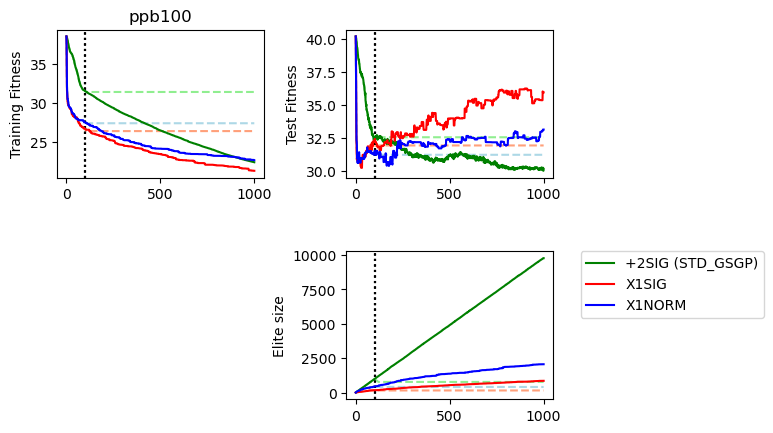

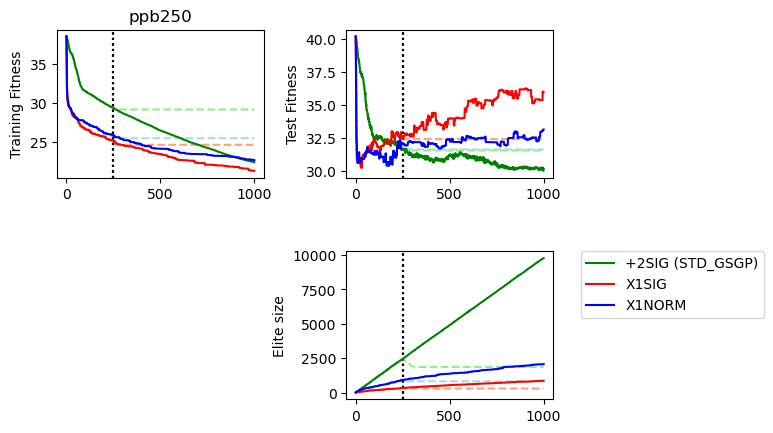

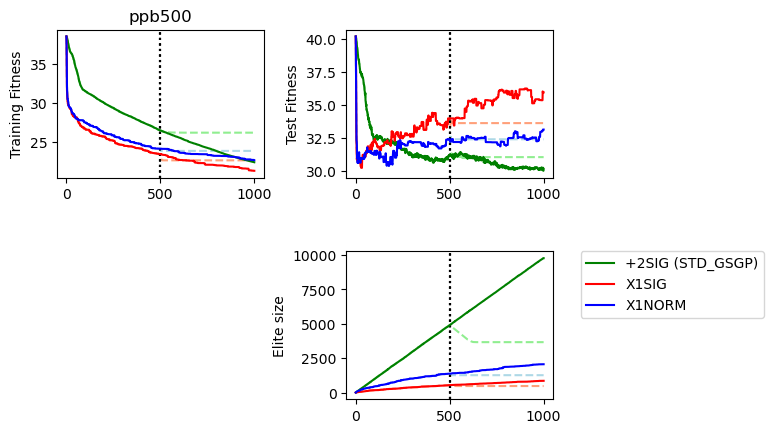

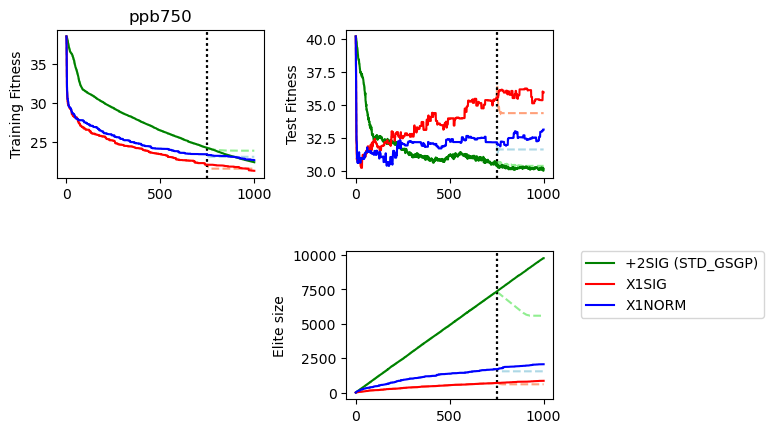

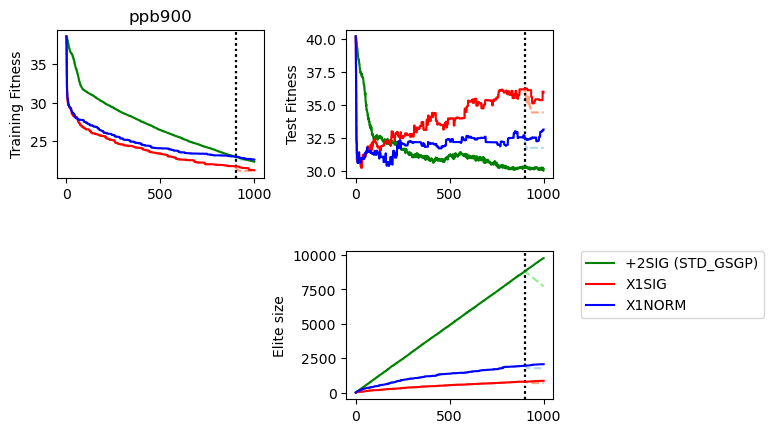

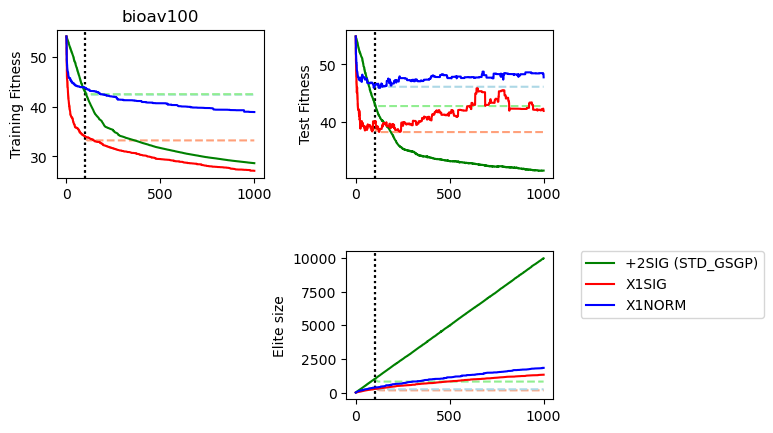

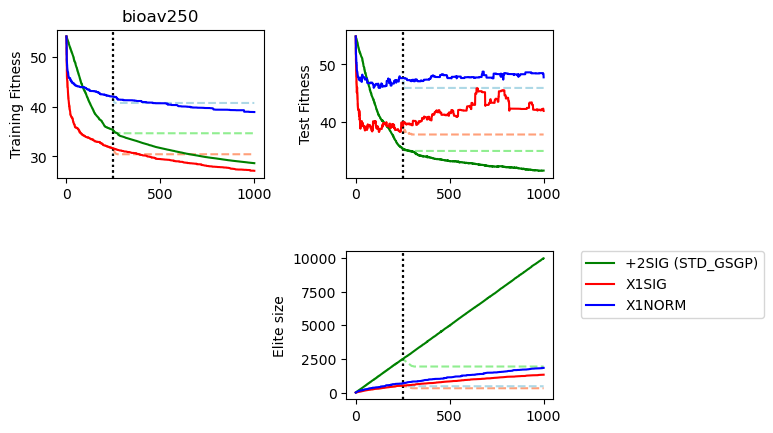

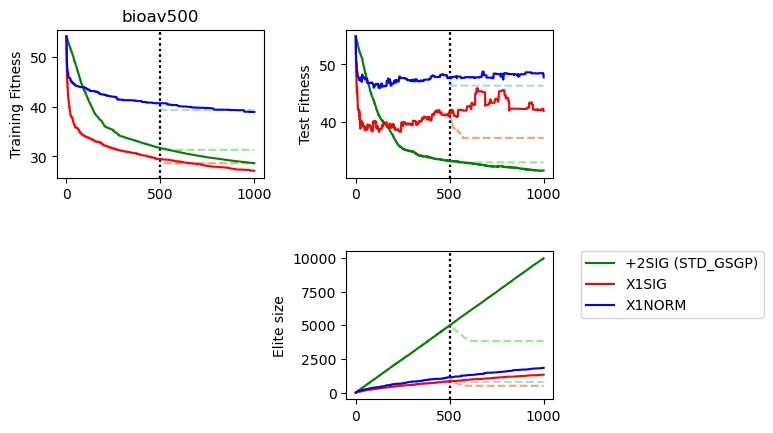

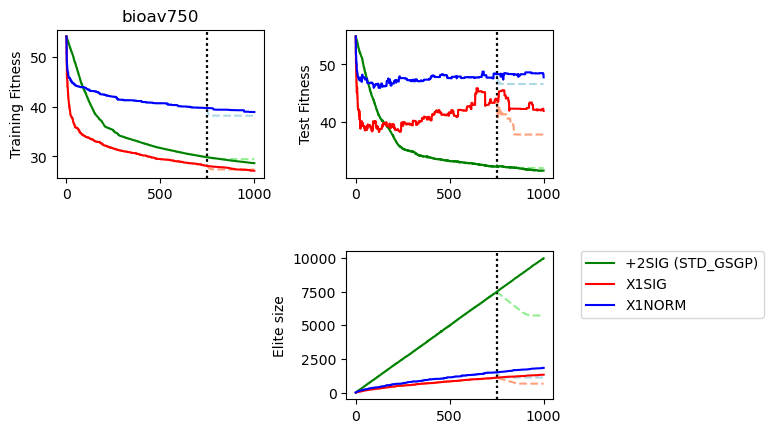

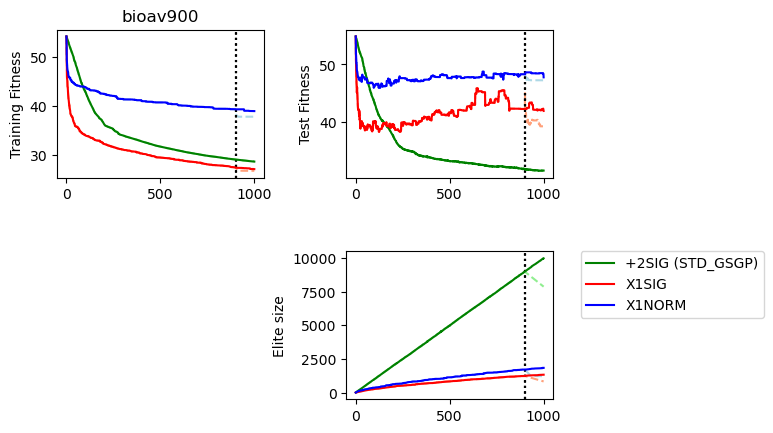

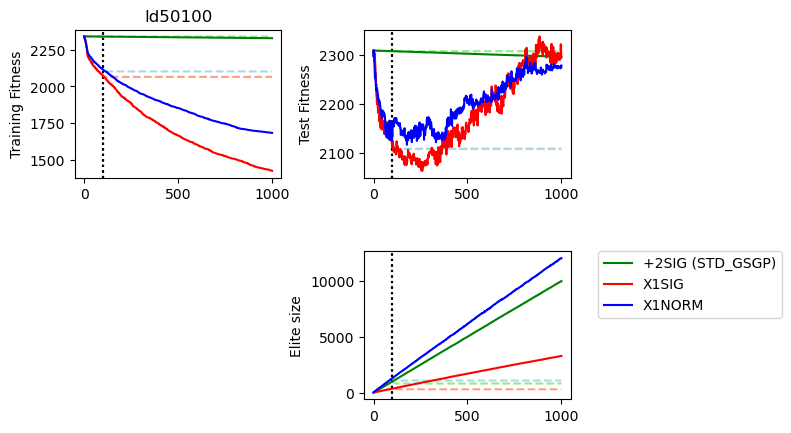

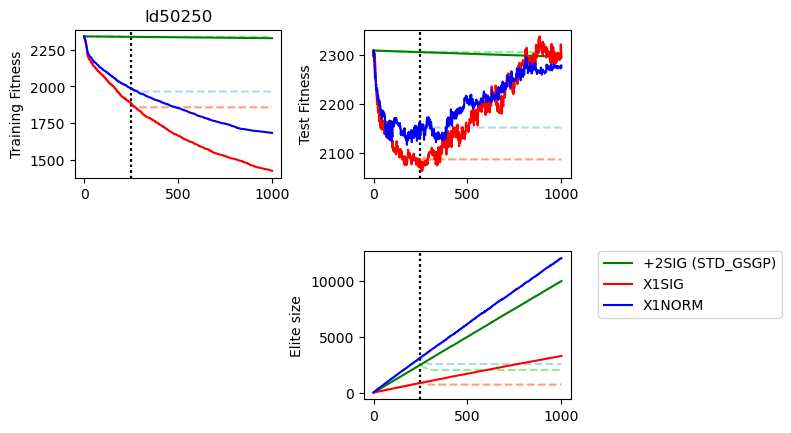

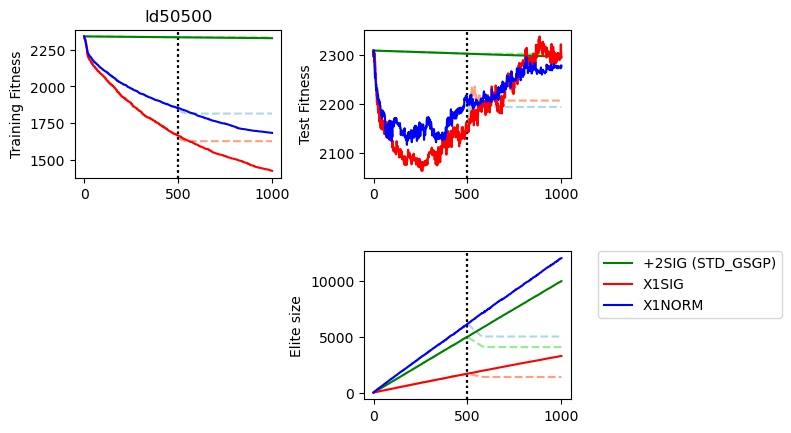

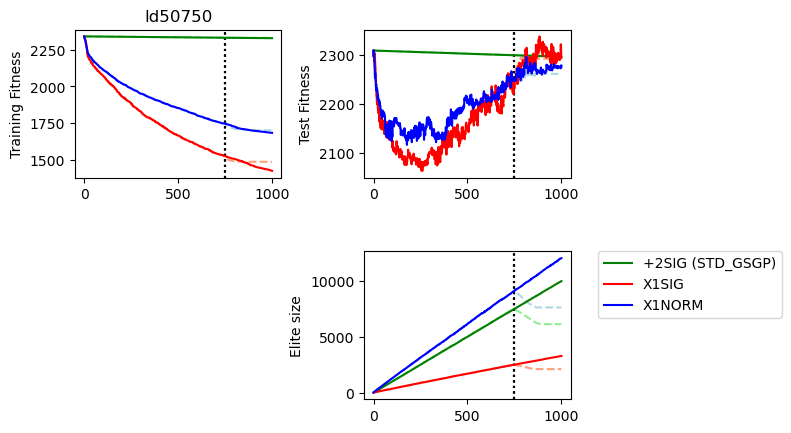

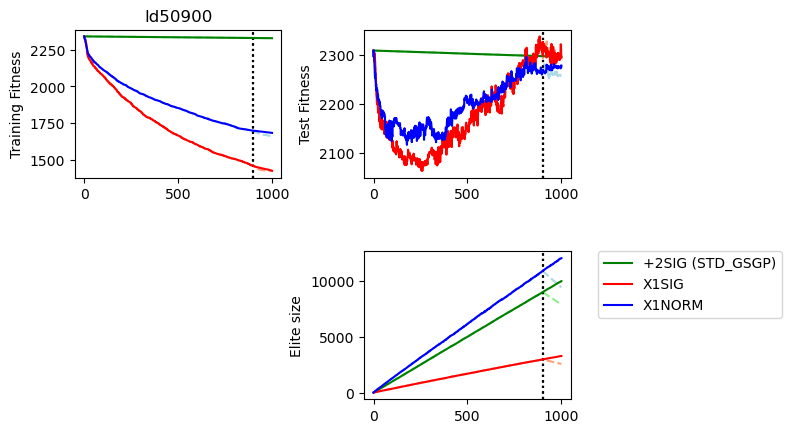

In [33]:
for data in results.dataset.unique():
    
    std_gsgp = baselines.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()
    gsgp_x1sig = baselines.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()
    gsgp_x1norm = baselines.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()


    for th in [100, 250, 500, 750, 900]:
        gs = gridspec.GridSpec(2, 2)
        gs.update( wspace=0.4, hspace = 0.5)
        pl.figure()
        
        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
        
            
            grouped = results.query("algo == @algo and dataset == @data and threshold == @th")[['generation',  "training_fitness","test_fitness", "elite_size"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax1.set_ylabel('Training Fitness')


            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            ax2.set_ylabel('Test Fitness')
            
            
            # ax3 = pl.subplot(gs[1, 0]) 
            # pl.plot(grouped.index, grouped['distance_chull'], color = colors[i], linestyle = 'dashed') #, label = algo
            # pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            # ax3.set_ylabel('CHull distance to GO')
            
            ax4 = pl.subplot(gs[1, 1]) #1,1 
            # for j, it in enumerate(grouped['elite_change'].values):
            #     if j > th and it == 1:
            #         pl.axvline(x = j, color = colors[i])
            pl.plot(grouped.index, grouped['elite_size'], color = colors[i], linestyle = 'dashed') #, label = algo
            pl.axvline(x = th, linestyle = 'dotted', color = 'black')
            # ax4.set_ylim(0, 3000)

            ax4.set_ylabel('Elite size')

            # ax5 = pl.subplot(gs[2, :]) #1,1 
            
            # # for j, it in enumerate(grouped['elite_change'].values):
            # #     if j > th and it == 1:
            # #         pl.axvline(x = j, color = colors[i])
            # pl.plot(grouped.index, grouped['elite_child'], color = e_colors[i], linestyle = e_style[i]) #, linestyle = 'dashed', label = algo
            # pl.axvline(x = th, linestyle = 'dotted', color = 'black')

            # ax5.set_title('Is the new elite an offspring of the previous elite?')
    
        ax1 = pl.subplot(gs[0, 0]) 
        pl.plot(std_gsgp.index, std_gsgp['training_fitness'], label = '+2SIG (STD_GSGP)', color = 'green')
        pl.plot(gsgp_x1sig.index, gsgp_x1sig['training_fitness'], label = 'X1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, gsgp_x1norm['training_fitness'], label = 'X1NORM', color = 'blue')


        ax2 = pl.subplot(gs[0, 1]) 
        pl.plot(std_gsgp.index, std_gsgp['test_fitness'], label = '+2SIG (STD_GSGP)', color = 'green')
        pl.plot(gsgp_x1sig.index, gsgp_x1sig['test_fitness'], label = 'X1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, gsgp_x1norm['test_fitness'], label = 'X1NORM', color = 'blue')


        # ax3 = pl.subplot(gs[1, 0]) 
        # pl.plot(std_gsgp.index, std_gsgp['distance_chull'], label = '+2SIG (STD_GSGP)', color = 'green')
        # pl.plot(gsgp_x1sig.index, gsgp_x1sig['distance_chull'], label = 'X1SIG', color = 'red')
        # pl.plot(gsgp_x1norm.index, gsgp_x1norm['distance_chull'], label = 'X1NORM', color = 'blue')

        ax4 = pl.subplot(gs[1, 1]) #1,1 
        pl.plot(std_gsgp.index, std_gsgp['elite_size'], label = '+2SIG (STD_GSGP)', color = 'green')
        pl.plot(gsgp_x1sig.index, gsgp_x1sig['elite_size'], label = 'X1SIG', color = 'red')
        pl.plot(gsgp_x1norm.index, gsgp_x1norm['elite_size'], label = 'X1NORM', color = 'blue')
            

        ax1.set_title(data + str(th))
        ax4.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()

In [43]:
def stat_test(measure, alpha = 0.05):
    
    total_results =  []
    
    for data in results.dataset.unique():
        
        std_gsgp = baselines.query("algo == 'SLIM+2SIG' and threshold == 1000 and dataset == @data and generation == 1000")[measure].values
        gsgp_x1sig = baselines.query("algo == 'SLIM*1SIG' and threshold == 1000 and dataset == @data and generation == 1000")[measure].values
        gsgp_x1norm = baselines.query("algo == 'SLIM*1NORM' and threshold == 1000 and dataset == @data and generation == 1000")[measure].values

        baseline = [
                    gsgp_x1sig,
                    gsgp_x1norm,
                    std_gsgp]
    

        for i, algo in enumerate(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG']):
            
            th_results = []
            
            for th in [100, 250, 500, 750, 900]:

                variant = results.query("algo == @algo and dataset == @data and threshold == @th and generation == 1000")[measure].values

                p_value_n = mannwhitneyu(baseline[i], variant)[1]
                p_value_s = str(round(p_value_n, 4)) if 'e' not in str(p_value_n) else (str(p_value_n).split('e')[0][:5] + 'e' + str(p_value_n)[-3:])
                if p_value_n <= alpha:
                    if np.median(baseline[i]) > np.median(variant):
                        p_value_s +=' *'
                        
                    p_value_s = 'bo{ ' + p_value_s + ' }bc'
                
                th_results.append(p_value_s)

            total_results.append([data, algo] + th_results)

    total_results = pd.DataFrame(total_results, columns = ['Data', 'Algorithm', 100, 250, 500, 750, 900])
    total_results.set_index(['Data', 'Algorithm'], inplace = True, drop = True)
    return total_results

In [44]:
test_stat = stat_test('test_fitness', alpha = 0.05/15)

In [45]:
test_stat

100                250  \
Data              Algorithm                                          
yatch             SLIM*1SIG   bo{ 5.858e-06 }bc             0.2116   
                  SLIM*1NORM     bo{ 0.0008 }bc             0.1624   
                  SLIM+2SIG   bo{ 3.019e-11 }bc  bo{ 4.077e-11 }bc   
airfoil           SLIM*1SIG   bo{ 3.019e-11 }bc  bo{ 2.033e-09 }bc   
                  SLIM*1NORM  bo{ 2.033e-09 }bc  bo{ 4.801e-07 }bc   
                  SLIM+2SIG   bo{ 3.019e-11 }bc     bo{ 0.0009 }bc   
concrete_slump    SLIM*1SIG              0.7958             0.9941   
                  SLIM*1NORM             0.3329             0.6735   
                  SLIM+2SIG      bo{ 0.0004 }bc             0.1373   
concrete_strength SLIM*1SIG      bo{ 0.0002 }bc             0.0451   
                  SLIM*1NORM     bo{ 0.0013 }bc             0.0798   
                  SLIM+2SIG   bo{ 8.993e-11 }bc  bo{ 2.028e-07 }bc   
ppb               SLIM*1SIG              0.0099             0.0451   
                  SLIM*1NORM             0.0798             0.3403   
                  SLIM+2SIG              0.0053              0.085   
bioav             SLIM*1SIG              0.0035   bo{ 0.0018 * }bc   
                  SLIM*1NORM              0.217             0.3255   
                  SLIM+2SIG   bo{ 3.824e-09 }bc  bo{ 8.882e-06 }bc   
ld50              SLIM*1SIG              0.0292             0.0042   
                  SLIM*1NORM             0.0406             0.0261   
                  SLIM+2SIG              0.7618             0.7618   

                                            500             750     900  
Data              Algorithm                                              
yatch             SLIM*1SIG              0.7618          0.9823  0.8476  
                  SLIM*1NORM             0.7506          0.5493  0.5201  
                  SLIM+2SIG   bo{ 1.429e-08 }bc  bo{ 0.0018 }bc  0.3478  
airfoil           SLIM*1SIG      bo{ 0.0001 }bc          0.2581  0.7172  
                  SLIM*1NORM             0.0117          0.4553  0.9705  
                  SLIM+2SIG      bo{ 0.0009 }bc          0.0049  0.2226  
concrete_slump    SLIM*1SIG              0.9941          0.5592     0.9  
                  SLIM*1NORM             0.6309          0.7172  0.7394  
                  SLIM+2SIG               0.652          0.9587     0.9  
concrete_strength SLIM*1SIG              0.4119          0.7845  0.9705  
                  SLIM*1NORM             0.4918             0.9  0.8187  
                  SLIM+2SIG      bo{ 0.0008 }bc          0.0468  0.5298  
ppb               SLIM*1SIG              0.0773          0.2519  0.3403  
                  SLIM*1NORM             0.3555          0.3953  0.5895  
                  SLIM+2SIG               0.429          0.7958   0.947  
bioav             SLIM*1SIG              0.0044          0.0242  0.0905  
                  SLIM*1NORM             0.1858          0.4035  0.5592  
                  SLIM+2SIG              0.0271          0.5298  0.9234  
ld50              SLIM*1SIG              0.0451          0.4376  0.7731  
                  SLIM*1NORM             0.0877          0.3183  0.5997  
                  SLIM+2SIG              0.7845          0.8073  0.8073

In [46]:
size_stat = stat_test('elite_size', alpha = 0.05/15)

In [47]:
size_stat

100                  250  \
Data              Algorithm                                              
yatch             SLIM*1SIG   bo{ 3.010e-11 * }bc  bo{ 3.334e-11 * }bc   
                  SLIM*1NORM  bo{ 3.019e-11 * }bc  bo{ 1.328e-10 * }bc   
                  SLIM+2SIG   bo{ 3.016e-11 * }bc  bo{ 3.017e-11 * }bc   
airfoil           SLIM*1SIG   bo{ 3.012e-11 * }bc  bo{ 3.014e-11 * }bc   
                  SLIM*1NORM  bo{ 3.019e-11 * }bc  bo{ 3.019e-11 * }bc   
                  SLIM+2SIG   bo{ 3.017e-11 * }bc  bo{ 3.014e-11 * }bc   
concrete_slump    SLIM*1SIG   bo{ 3.016e-11 * }bc  bo{ 3.019e-11 * }bc   
                  SLIM*1NORM  bo{ 3.019e-11 * }bc  bo{ 4.074e-11 * }bc   
                  SLIM+2SIG   bo{ 3.016e-11 * }bc  bo{ 3.016e-11 * }bc   
concrete_strength SLIM*1SIG   bo{ 3.017e-11 * }bc  bo{ 3.014e-11 * }bc   
                  SLIM*1NORM  bo{ 3.012e-11 * }bc  bo{ 3.507e-11 * }bc   
                  SLIM+2SIG   bo{ 3.014e-11 * }bc  bo{ 3.017e-11 * }bc   
ppb               SLIM*1SIG   bo{ 2.989e-11 * }bc  bo{ 3.008e-11 * }bc   
                  SLIM*1NORM  bo{ 3.006e-11 * }bc  bo{ 3.012e-11 * }bc   
                  SLIM+2SIG   bo{ 2.999e-11 * }bc  bo{ 3.016e-11 * }bc   
bioav             SLIM*1SIG   bo{ 2.997e-11 * }bc  bo{ 3.002e-11 * }bc   
                  SLIM*1NORM  bo{ 3.016e-11 * }bc  bo{ 3.012e-11 * }bc   
                  SLIM+2SIG   bo{ 3.017e-11 * }bc  bo{ 3.017e-11 * }bc   
ld50              SLIM*1SIG   bo{ 2.987e-11 * }bc  bo{ 3.002e-11 * }bc   
                  SLIM*1NORM  bo{ 3.010e-11 * }bc  bo{ 3.016e-11 * }bc   
                  SLIM+2SIG   bo{ 3.004e-11 * }bc  bo{ 3.012e-11 * }bc   

                                              500                  750  \
Data              Algorithm                                              
yatch             SLIM*1SIG   bo{ 1.594e-07 * }bc     bo{ 0.0026 * }bc   
                  SLIM*1NORM  bo{ 2.572e-07 * }bc     bo{ 0.0027 * }bc   
                  SLIM+2SIG   bo{ 3.017e-11 * }bc  bo{ 3.017e-11 * }bc   
airfoil           SLIM*1SIG   bo{ 3.016e-11 * }bc  bo{ 1.611e-10 * }bc   
                  SLIM*1NORM  bo{ 1.311e-08 * }bc     bo{ 0.0001 * }bc   
                  SLIM+2SIG   bo{ 3.017e-11 * }bc  bo{ 3.019e-11 * }bc   
concrete_slump    SLIM*1SIG   bo{ 5.069e-10 * }bc  bo{ 5.089e-06 * }bc   
                  SLIM*1NORM  bo{ 1.010e-08 * }bc     bo{ 0.0002 * }bc   
                  SLIM+2SIG   bo{ 3.012e-11 * }bc  bo{ 3.016e-11 * }bc   
concrete_strength SLIM*1SIG   bo{ 1.203e-10 * }bc  bo{ 5.183e-07 * }bc   
                  SLIM*1NORM  bo{ 1.066e-07 * }bc     bo{ 0.0025 * }bc   
                  SLIM+2SIG   bo{ 3.016e-11 * }bc  bo{ 3.016e-11 * }bc   
ppb               SLIM*1SIG   bo{ 4.062e-11 * }bc  bo{ 2.887e-07 * }bc   
                  SLIM*1NORM  bo{ 4.383e-10 * }bc  bo{ 5.591e-07 * }bc   
                  SLIM+2SIG   bo{ 3.012e-11 * }bc  bo{ 3.019e-11 * }bc   
bioav             SLIM*1SIG   bo{ 3.012e-11 * }bc  bo{ 3.014e-11 * }bc   
                  SLIM*1NORM  bo{ 3.685e-11 * }bc  bo{ 7.372e-10 * }bc   
                  SLIM+2SIG   bo{ 3.016e-11 * }bc  bo{ 3.016e-11 * }bc   
ld50              SLIM*1SIG   bo{ 3.008e-11 * }bc  bo{ 3.004e-11 * }bc   
                  SLIM*1NORM  bo{ 3.014e-11 * }bc  bo{ 3.012e-11 * }bc   
                  SLIM+2SIG   bo{ 3.012e-11 * }bc  bo{ 3.012e-11 * }bc   

                                              900  
Data              Algorithm                        
yatch             SLIM*1SIG                0.0246  
                  SLIM*1NORM               0.0266  
                  SLIM+2SIG   bo{ 3.017e-11 * }bc  
airfoil           SLIM*1SIG   bo{ 5.303e-08 * }bc  
                  SLIM*1NORM               0.0246  
                  SLIM+2SIG   bo{ 3.019e-11 * }bc  
concrete_slump    SLIM*1SIG      bo{ 0.0012 * }bc  
                  SLIM*1NORM               0.0232  
                  SLIM+2SIG   bo{ 3.016e-11 * }bc  
concrete_strength SLIM*1SIG      bo{ 0.0004 * }bc  
                

In [48]:
print(test_stat.to_latex())

\begin{tabular}{lllllll}
\toprule
 &  & 100 & 250 & 500 & 750 & 900 \\
Data & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{yatch} & SLIM*1SIG & bo{ 5.858e-06 }bc & 0.2116 & 0.7618 & 0.9823 & 0.8476 \\
 & SLIM*1NORM & bo{ 0.0008 }bc & 0.1624 & 0.7506 & 0.5493 & 0.5201 \\
 & SLIM+2SIG & bo{ 3.019e-11 }bc & bo{ 4.077e-11 }bc & bo{ 1.429e-08 }bc & bo{ 0.0018 }bc & 0.3478 \\
\cline{1-7}
\multirow[t]{3}{*}{airfoil} & SLIM*1SIG & bo{ 3.019e-11 }bc & bo{ 2.033e-09 }bc & bo{ 0.0001 }bc & 0.2581 & 0.7172 \\
 & SLIM*1NORM & bo{ 2.033e-09 }bc & bo{ 4.801e-07 }bc & 0.0117 & 0.4553 & 0.9705 \\
 & SLIM+2SIG & bo{ 3.019e-11 }bc & bo{ 0.0009 }bc & bo{ 0.0009 }bc & 0.0049 & 0.2226 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_slump} & SLIM*1SIG & 0.7958 & 0.9941 & 0.9941 & 0.5592 & 0.9 \\
 & SLIM*1NORM & 0.3329 & 0.6735 & 0.6309 & 0.7172 & 0.7394 \\
 & SLIM+2SIG & bo{ 0.0004 }bc & 0.1373 & 0.652 & 0.9587 & 0.9 \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_strength} & SLIM*1SIG & bo{ 0.0002 }bc & 0.

In [49]:
print(size_stat.to_latex())

\begin{tabular}{lllllll}
\toprule
 &  & 100 & 250 & 500 & 750 & 900 \\
Data & Algorithm &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{yatch} & SLIM*1SIG & bo{ 3.010e-11 * }bc & bo{ 3.334e-11 * }bc & bo{ 1.594e-07 * }bc & bo{ 0.0026 * }bc & 0.0246 \\
 & SLIM*1NORM & bo{ 3.019e-11 * }bc & bo{ 1.328e-10 * }bc & bo{ 2.572e-07 * }bc & bo{ 0.0027 * }bc & 0.0266 \\
 & SLIM+2SIG & bo{ 3.016e-11 * }bc & bo{ 3.017e-11 * }bc & bo{ 3.017e-11 * }bc & bo{ 3.017e-11 * }bc & bo{ 3.017e-11 * }bc \\
\cline{1-7}
\multirow[t]{3}{*}{airfoil} & SLIM*1SIG & bo{ 3.012e-11 * }bc & bo{ 3.014e-11 * }bc & bo{ 3.016e-11 * }bc & bo{ 1.611e-10 * }bc & bo{ 5.303e-08 * }bc \\
 & SLIM*1NORM & bo{ 3.019e-11 * }bc & bo{ 3.019e-11 * }bc & bo{ 1.311e-08 * }bc & bo{ 0.0001 * }bc & 0.0246 \\
 & SLIM+2SIG & bo{ 3.017e-11 * }bc & bo{ 3.014e-11 * }bc & bo{ 3.017e-11 * }bc & bo{ 3.019e-11 * }bc & bo{ 3.019e-11 * }bc \\
\cline{1-7}
\multirow[t]{3}{*}{concrete_slump} & SLIM*1SIG & bo{ 3.016e-11 * }bc & bo{ 3.019e-11 * }bc & bo{ 5.